In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyprojroot
import seaborn as sns

In [2]:
SOURCE_DATA_ROOT = pyprojroot.here().joinpath('results/VSD/source_data')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-2')

In [3]:
acc_v_r_coeff_df = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('acc_v_r_coeff.csv')
)

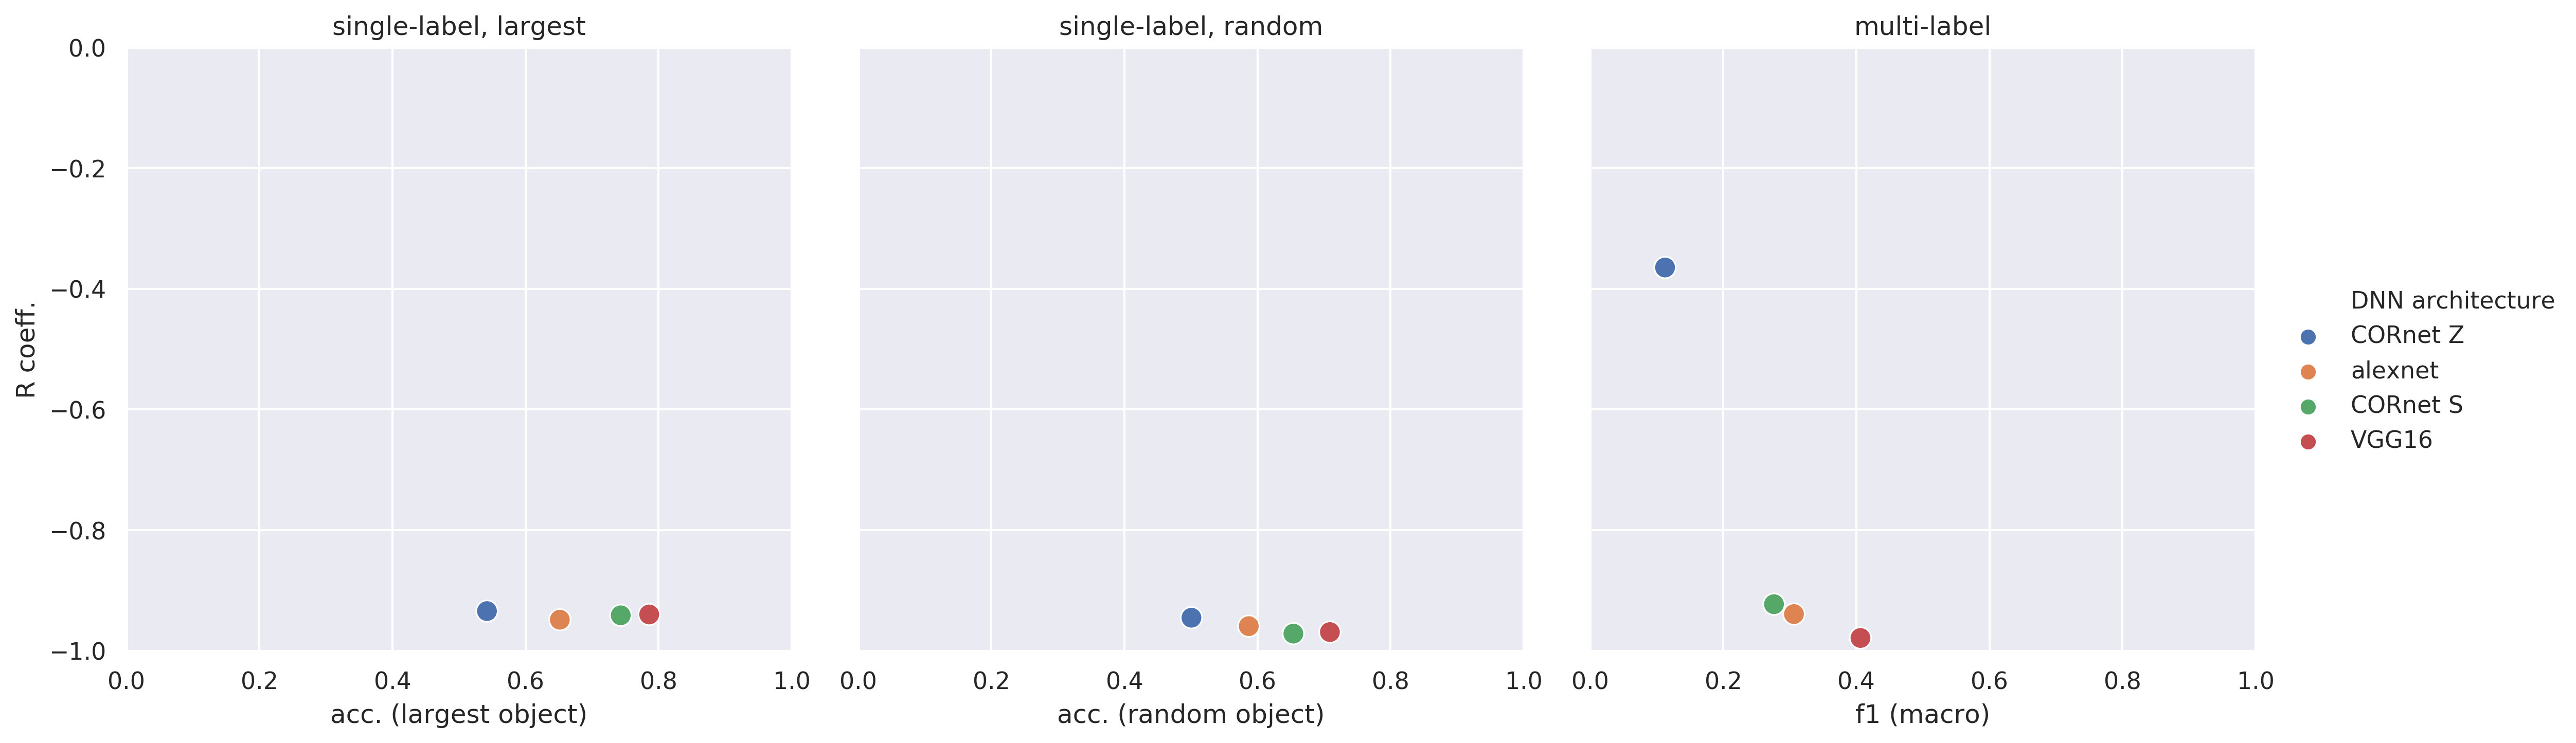

In [9]:
TITLES = ['single-label, largest', 'single-label, random', 'multi-label']
XLABELS = ['acc. (largest object)', 'acc. (random object)', 'f1 (macro)']
YLABEL = 'R coeff.'

sns.set()


g = sns.relplot(x='metric_val', y='r', col='task (M.L.)', hue='DNN architecture', data=acc_v_r_coeff_df, s=100);
for ind, (ax, title, xlabel) in enumerate(zip(g.axes[0], TITLES, XLABELS)):
    ax.set_ylim([-1.0, 0])
    ax.set_xlim([0, 1.0])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if ind == 0:
        ax.set_ylabel(YLABEL)
g.fig.set_dpi(300)
g.fig.subplots_adjust(wspace=0.1)

for ext in ('svg', 'png'):
    fig_path = FIGURES_ROOT.joinpath(
        f'test-acc-v-r-coeff/test-acc-v-r-coeff.{ext}'
    )
    plt.savefig(fig_path)